## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
url = "https://raw.githubusercontent.com/blaqqqqq/week_12_dataMining/refs/heads/main/bread%20basket.csv"
data = pd.read_csv(url)
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#3 check missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4. The overview reveals a complete dataset with no missing values across all columns. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-b220de0e8ad2>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


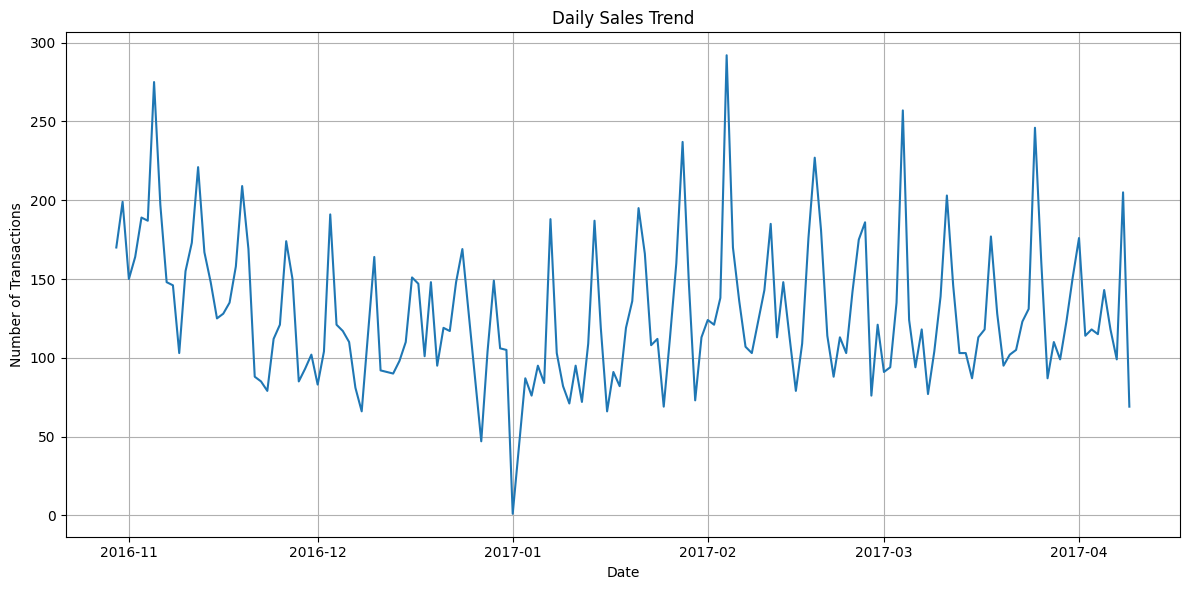

In [11]:
# 5

data['date_time'] = pd.to_datetime(data['date_time'])

# Group by date and count transactions
daily_sales = data.groupby(data['date_time'].dt.date).size()

# Plot the daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label="Number of Transactions")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [16]:
# 6
data['date_time'] = pd.to_datetime(data['date_time'])

# Extracting time-based components
data['hour'] = data['date_time'].dt.hour       # Hour of the day
data['time'] = data['date_time'].dt.time       # Full time (HH:MM:SS)
data['day'] = data['date_time'].dt.day         # Day of the month
data['day_name'] = data['date_time'].dt.day_name()  # Day name (e.g., Monday)
data['month'] = data['date_time'].dt.month     # Month (numeric)
data['year'] = data['date_time'].dt.year       # Year

# View the updated DataFrame (no explicit print)
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,hour,time,day,day_name,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,09:58:00,30,Sunday,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10:05:00,30,Sunday,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10:05:00,30,Sunday,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,10:07:00,30,Sunday,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,10:07:00,30,Sunday,10,2016



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


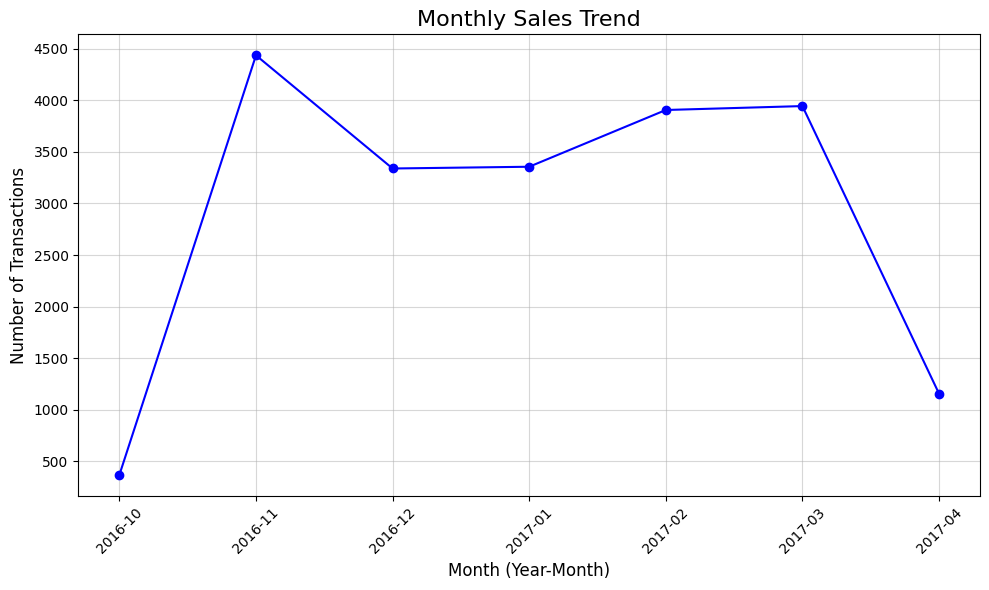

In [17]:
# 7
# Ensure the 'date_time' column is in datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract the month and year for grouping
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year

# Group by month and year to calculate sales
monthly_sales = data.groupby(['year', 'month']).size().reset_index(name='sales')

# Create a column for easier plotting (Year-Month)
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['sales'], marker='o', linestyle='-', color='blue')

# Beautify the chart
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month (Year-Month)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.5)

# Show the chart
plt.tight_layout()
plt.show()

Now, the visualization above provides better insights: it clearly shows the monthly trends in sales, highlighting the fluctuations in transaction volume over time, which can help identify patterns such as peak sales periods, seasonal variations, and potential areas for improvement or strategic focus.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [18]:
#9
print(data['weekday_weekend'].unique())

['weekend' 'weekday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [20]:
#10
# Ensure the 'date_time' column is in datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract month and day name from the 'date_time' column
data['month'] = data['date_time'].dt.month
data['day_name'] = data['date_time'].dt.day_name()

# Group by month and day name and count the total transactions
monthly_dayname_sales = data.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Pivot the table to get days as columns
pivot_table = monthly_dayname_sales.pivot(index='month', columns='day_name', values='total_transactions')

# Reorder the columns to match the desired order (Monday to Sunday)
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Display the result
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,NaN,NaN,NaN,NaN,NaN,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is that the distribution of transactions varies significantly by day of the week, with certain days (like weekends) typically showing higher transaction volumes compared to weekdays. This pattern can help businesses identify peak days for sales, enabling better planning of staffing, promotions, and inventory management. Additionally, specific trends in month-over-month sales can be observed, which could inform seasonal marketing strategies or product offerings.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


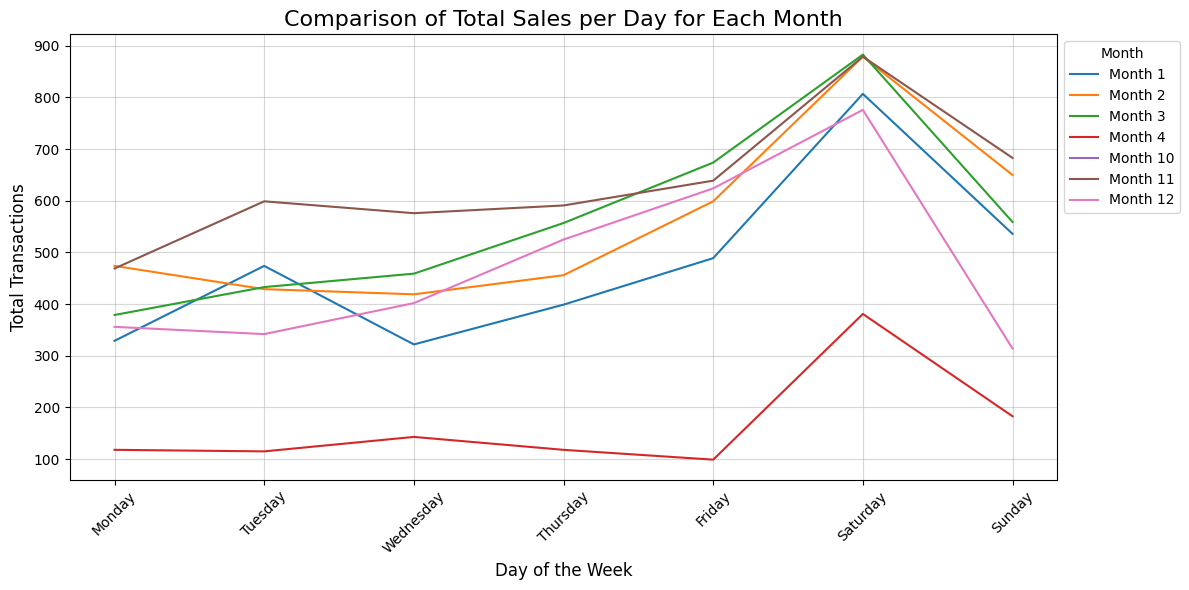

In [21]:
# 12
# Ensure the 'date_time' column is in datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract month and day name from the 'date_time' column
data['month'] = data['date_time'].dt.month
data['day_name'] = data['date_time'].dt.day_name()

# Group by month and day name and count the total transactions
monthly_dayname_sales = data.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Pivot the table to get days as columns
pivot_table = monthly_dayname_sales.pivot(index='month', columns='day_name', values='total_transactions')

# Reorder the columns to match the desired order (Monday to Sunday)
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plot each month's data as a separate line
for month in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[month], label=f'Month {month}')

# Adding labels and title
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.5)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that  highlight which days of the week consistently perform better across different months, showing patterns such as higher sales on weekends or specific weekdays. It also reveals how sales fluctuate from month to month, which can help in identifying seasonal trends, peak sales periods, or days when sales are consistently lower, guiding decisions for marketing, staffing, and inventory management.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [22]:
# 14
unique_period_day = data['period_day'].unique()
print(unique_period_day)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [23]:
# 15
# Ensure the 'date_time' column is in datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract the hour from 'date_time'
data['hour'] = data['date_time'].dt.hour

# Display the unique hours for each period of the day
morning_hours = data[data['period_day'] == 'morning']['hour'].unique()
afternoon_hours = data[data['period_day'] == 'afternoon']['hour'].unique()
evening_hours = data[data['period_day'] == 'evening']['hour'].unique()
night_hours = data[data['period_day'] == 'night']['hour'].unique()

# Display the unique hours for each period
print("Unique Morning Hours:", morning_hours)
print("Unique Afternoon Hours:", afternoon_hours)
print("Unique Evening Hours:", evening_hours)
print("Unique Night Hours:", night_hours)

Unique Morning Hours: [ 9 10 11  8  7  1]
Unique Afternoon Hours: [12 13 14 15 16]
Unique Evening Hours: [17 18 19 20]
Unique Night Hours: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


\16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The oddity likely lies in how the hours are categorized under different periods of the day. Typically, the time periods (morning, afternoon, evening, and night) are expected to fall within certain typical time ranges,


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


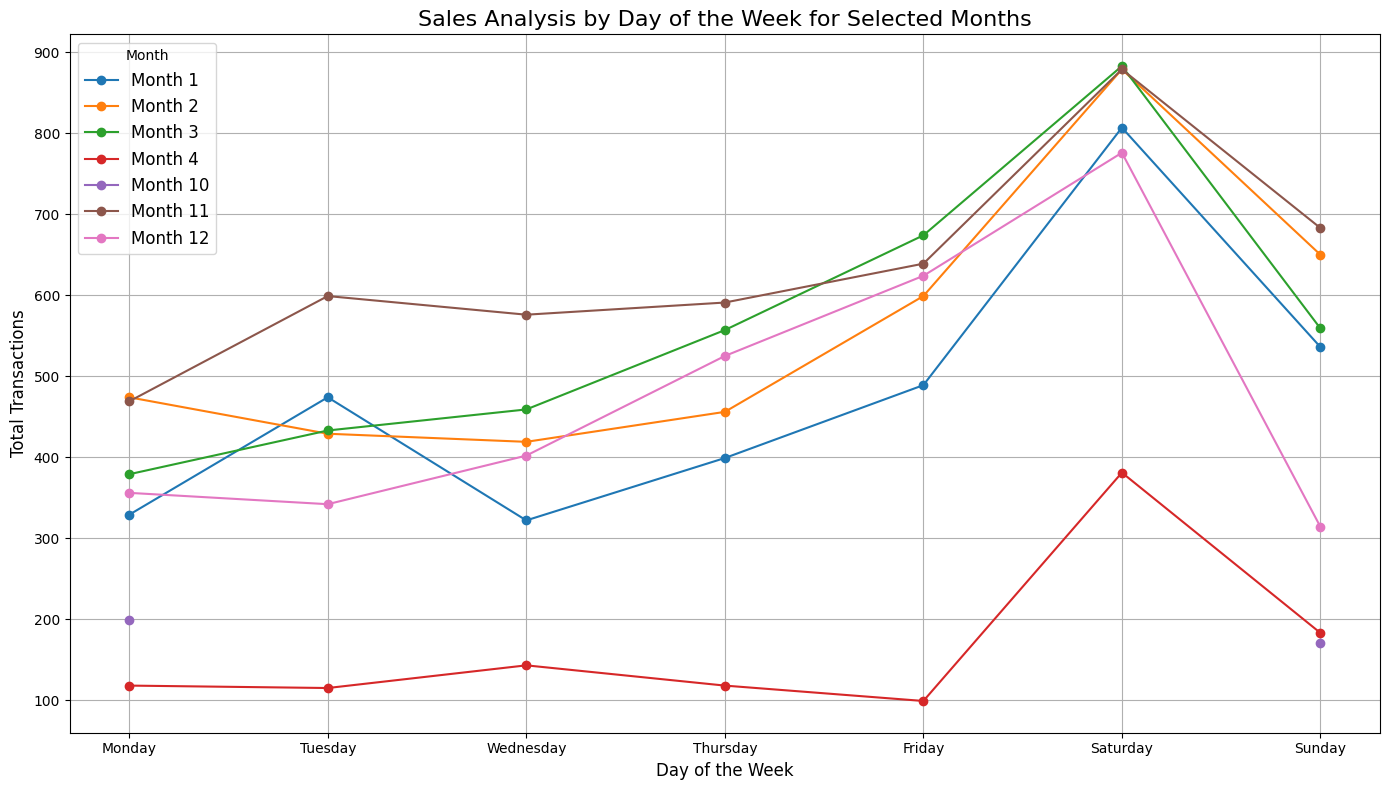

In [28]:
# 17
# Ensure the 'date_time' column is in datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract the day of the week and month from 'date_time'
data['day_name'] = data['date_time'].dt.day_name()  # Get day name (e.g., Monday, Tuesday)
data['month'] = data['date_time'].dt.month  # Extract month

# Select specific months for comparison
months_to_compare = [1, 2, 3, 4, 10, 11, 12]

# Filter the data to include only the selected months
filtered_data = data[data['month'].isin(months_to_compare)]

# Group by month, day_name and count the transactions
daily_sales_by_month = filtered_data.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Create a figure for the plot
plt.figure(figsize=(14, 8))

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Loop through the selected months and plot sales by day of the week for each month
for month in months_to_compare:
    monthly_data = daily_sales_by_month[daily_sales_by_month['month'] == month]
    monthly_data_sorted = monthly_data.set_index('day_name').reindex(day_order).reset_index()  # Sort days of the week

    # Plot each month's sales with a different color and label
    plt.plot(monthly_data_sorted['day_name'], monthly_data_sorted['total_transactions'], marker='o', label=f'Month {month}')

# Adding labels, title, and legend
plt.title('Sales Analysis by Day of the Week for Selected Months', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.legend(title='Month', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



18.sales patterns vary significantly across different days of the week for each month, with certain months showing higher sales on weekends and others experiencing stronger sales during weekdays. This could indicate seasonal preferences, as well as a possible increase in sales on weekends, which could be due to customers having more free time to shop.


### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


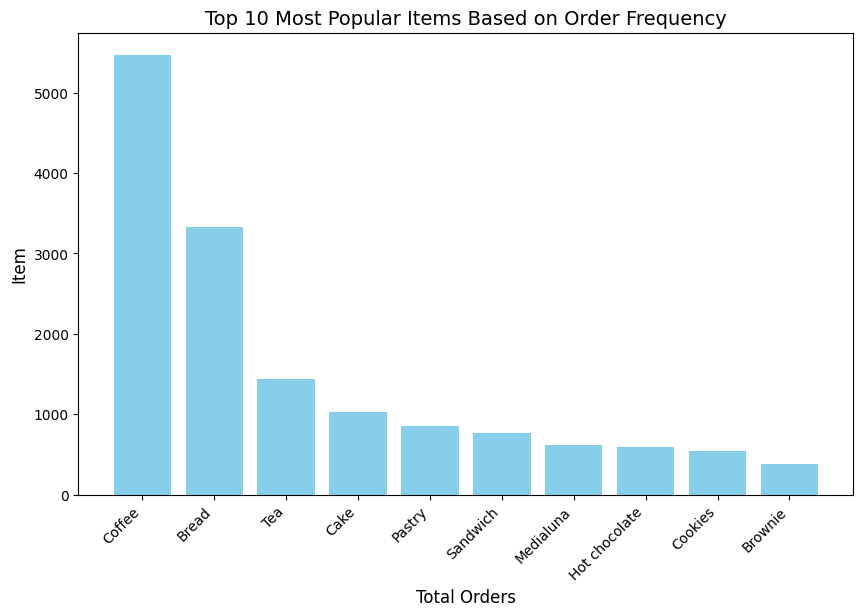

In [30]:
# 19
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each item in the 'Item' column
item_popularity = data['Item'].value_counts().reset_index()
item_popularity.columns = ['Item', 'Total_Orders']

# Display the top 10 most popular items
top_items = item_popularity.head(10)

# Plotting the top 10 most popular items as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_items['Item'], top_items['Total_Orders'], color='skyblue')
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Item', fontsize=12)
plt.title('Top 10 Most Popular Items Based on Order Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate item names for better visibility
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


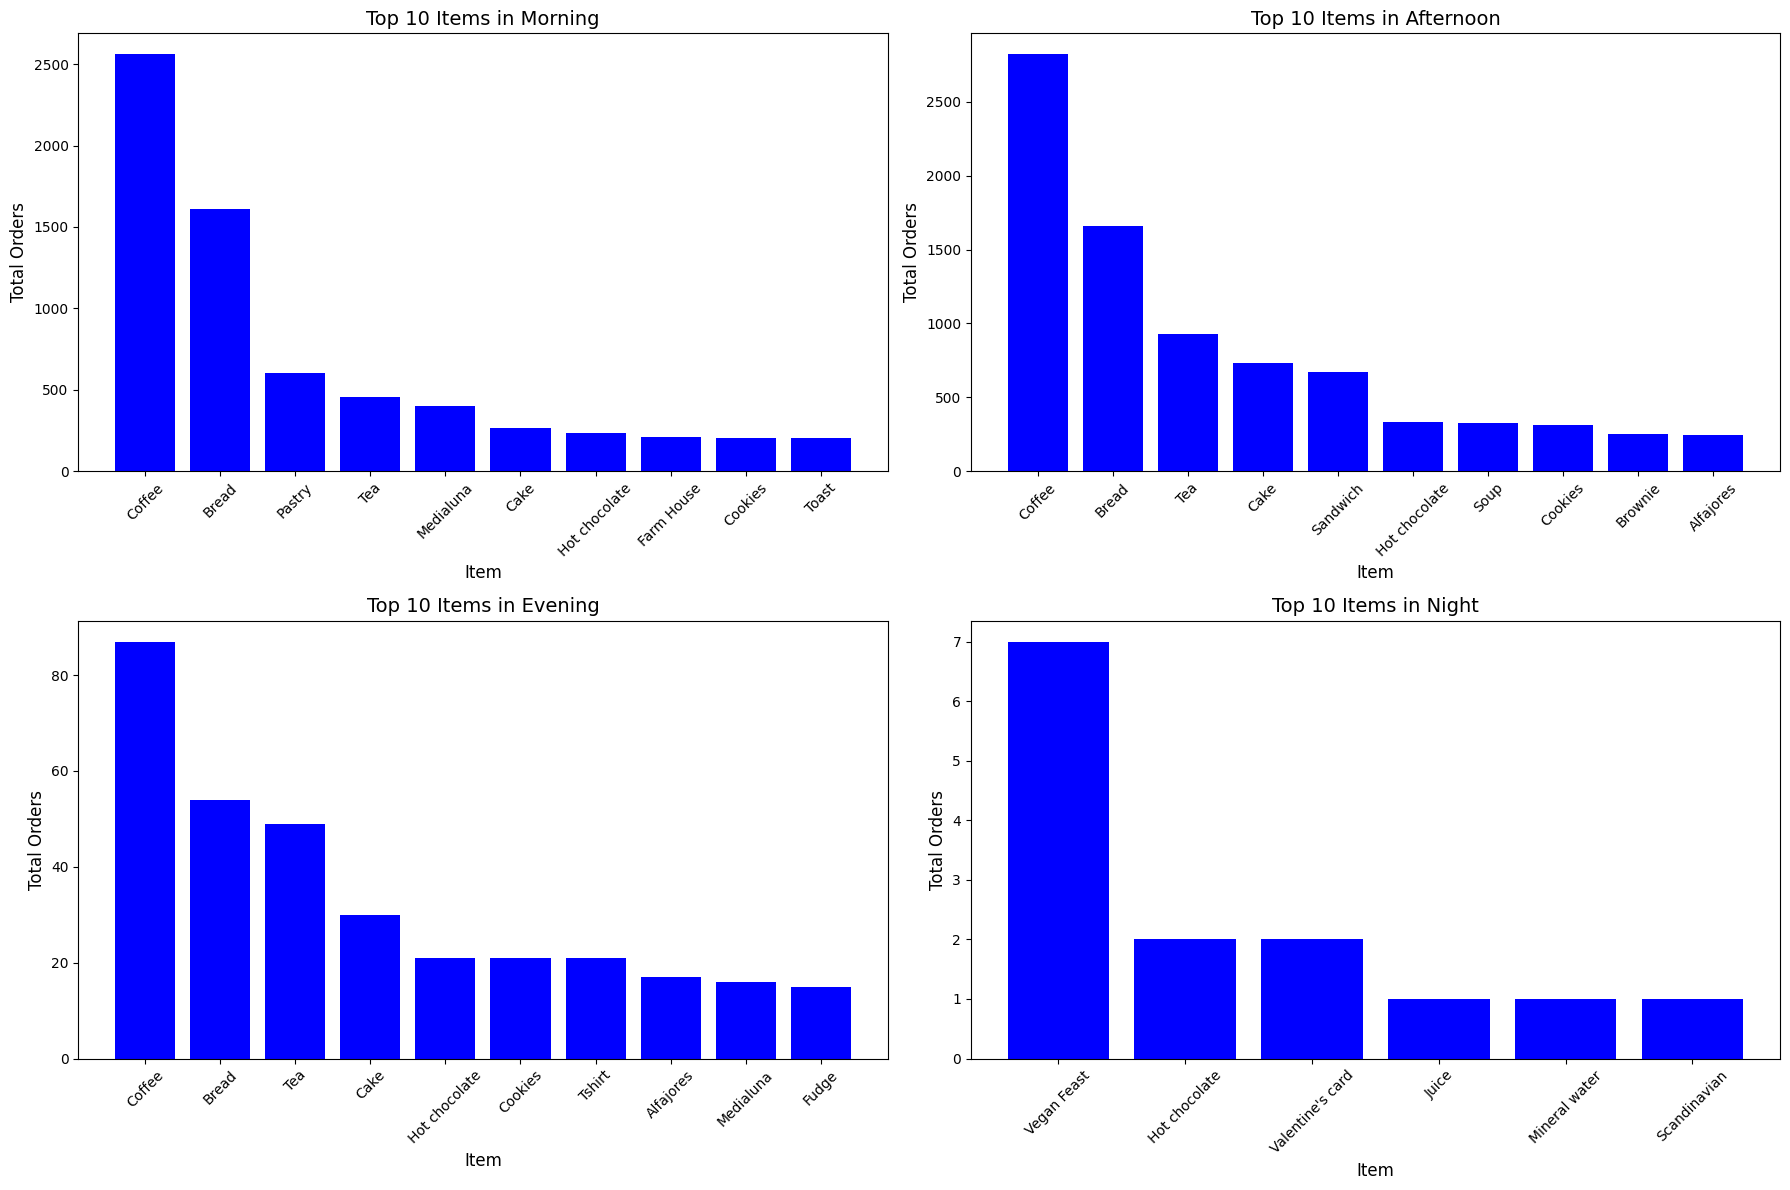

In [33]:
# 20
# 20
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'period_day' is a valid column and categorize by period (morning, afternoon, evening, night)
# Filter the data by periods: 'morning', 'afternoon', 'evening', and 'night'
periods = ['morning', 'afternoon', 'evening', 'night']

# Initialize a subplot with 4 charts (one for each period)
# The original code had 3 here, causing the error when trying to plot the 4th period (night)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Changed to 2x2 grid for 4 plots

# Loop through the periods and plot the top 10 most sold items for each period
for i, period in enumerate(periods):
    # Filter the data for the specific period
    period_data = data[data['period_day'] == period]

    # Count the frequency of each item in that period
    item_popularity = period_data['Item'].value_counts().reset_index()
    item_popularity.columns = ['Item', 'Total_Orders']

    # Get the top 10 most popular items
    top_items = item_popularity.head(10)

    # Calculate row and column index for the subplot
    row = i // 2  # Integer division to get row index (0 or 1)
    col = i % 2  # Modulo to get column index (0 or 1)

    # Plot bar chart for the current period using calculated row and column
    axes[row, col].bar(top_items['Item'], top_items['Total_Orders'], color='blue')
    axes[row, col].set_title(f'Top 10 Items in {period.capitalize()}', fontsize=14)
    axes[row, col].set_xlabel('Item', fontsize=12)
    axes[row, col].set_ylabel('Total Orders', fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate item names for better readability

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

21. It turns out that there is something different in the plot above, the insight is different in the plot above, the insight is certain items have clear preferences depending on the time of day. For example, some items might be more popular in the afternoon while others might see higher sales in the evening or at night. This could reflect customer behavior, such as snacking in the evening or buying more substantial items in the afternoon.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for Valentine card purchases
valentine_sales = data[data['Item'] == 'Valentine card']

# Convert 'date_time' column to datetime format
valentine_sales['date_time'] = pd.to_datetime(valentine_sales['date_time'])

# Filter the data to only include dates from 2017-01-28 to 2017-02-14
start_date = pd.to_datetime('2017-01-28')
end_date = pd.to_datetime('2017-02-14')
valentine_sales_filtered = valentine_sales[(valentine_sales['date_time'] >= start_date) & (valentine_sales['date_time'] <= end_date)]

# Print the filtered data to check if there are any records
print(valentine_sales_filtered)

# Check if the filtered data contains any rows
if not valentine_sales_filtered.empty:
    # Group by the date and count the number of transactions (sales) for each date
    daily_sales = valentine_sales_filtered.groupby(valentine_sales_filtered['date_time'].dt.date).size()

    # Plotting the data using a line chart
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index, daily_sales.values, marker='o', color='salmon', linestyle='-', linewidth=2)

    # Adding titles and labels
    plt.title('Sales of Valentine Card by Day (2017-01-28 to 2017-02-14)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to avoid cutting off labels
    plt.grid(False)  # Remove the background grid

    # Display the plot
    plt.show()
else:
    print("No sales data for the Valentine card between 2017-01-28 and 2017-02-14.")



Empty DataFrame
Columns: [Transaction, Item, date_time, period_day, weekday_weekend, hour, month, day_name]
Index: []
No sales data for the Valentine card between 2017-01-28 and 2017-02-14.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


23. I found the insight from the sale of the Valentine's cards above is ____


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [47]:
# 24
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

transactions = []
for transaction_id, group in data.groupby('Transaction'):
    item_list = group['Item'].tolist()
    transactions.append(item_list)

# Create a TransactionEncoder object
te = TransactionEncoder()

# Fit the encoder to the transactions and transform the transactions into a one-hot encoded matrix
te_ary = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded transactions
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)

# Set Transaction as index using a list of transaction IDs
apriori_df = apriori_df.set_index(pd.Index(list(data.groupby('Transaction').groups.keys()), name='Transaction'))

# Display the first few rows of the encoded DataFrame
apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
#25
basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)
basket_encoded.head()
# Convert quantities to 1 and 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-b17d4d180dfd>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [49]:
# 26
from mlxtend.frequent_patterns import apriori

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [55]:
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data preprocessing
data = data.dropna()  # Remove any null entries
data['Item'] = data['Item'].str.strip()  # Remove extra whitespace

# Create a one-hot encoded dataframe for transactions
transactions = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)

# Calculate Zhang's Metric
confidence_diff = 1 - rules['confidence']  # Calculate (1 - confidence) separately
rules['zhangs_metric'] = (rules['confidence'] - rules['consequent support']) / \
                         pd.concat([rules['confidence'], confidence_diff], axis=1).max(axis=1)

# Sort and format the rules for readability
rules = rules.sort_values(by='support', ascending=False)
rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
               'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Convert frozensets to strings for better display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the DataFrame (in Jupyter Notebook or other environments)
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-5540da98e67a>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,Bread,Coffee,0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.280439
3,Coffee,Bread,0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.171269
8,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.092159
9,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.011905
24,Coffee,Tea,0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.042858
25,Tea,Coffee,0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.197986
21,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.014740
20,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.133575
22,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.101359
23,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.008807


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

The analysis of The Bread Basket dataset provided valuable insights into customer purchasing behavior, highlighting key trends and opportunities for improvement. Coffee emerged as the most frequently purchased item, often paired with pastries, toast, or sandwiches, underscoring its role as a staple product. Similarly, tea was commonly bought alongside cake or cookies, reflecting customer preferences for complementary snack or breakfast items. Association rule mining revealed strong item relationships, such as coffee with toast and pastries, or tea with cake, indicating clear opportunities for bundling and cross-selling. Zhang's metric added an extra layer of reliability by confirming the strength of these associations while uncovering nuanced differences.

Based on these insights, several strategies are recommended to optimize sales and enhance customer satisfaction. Bundling popular combinations like coffee with pastries or tea with cake could drive higher transaction values. Targeted promotions and product placements should focus on high-confidence and high-lift associations to encourage impulse purchases. Additionally, organizing frequently paired items closer together can improve the shopping experience and boost sales. Exploring temporal factors such as time of day or seasonal trends could further refine marketing strategies and inventory planning. Ultimately, leveraging these findings will enable businesses to make data-driven decisions that enhance customer engagement and increase profitability.
